In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('height-weight.csv')

In [3]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

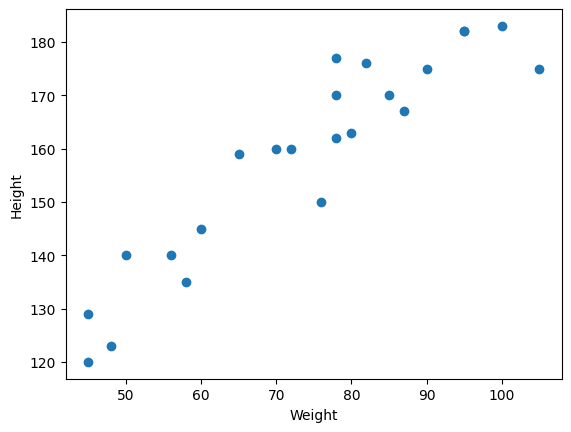

In [5]:
# Scatter plot
plt.scatter(df['Weight'], df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")

In [6]:
# Correlation
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


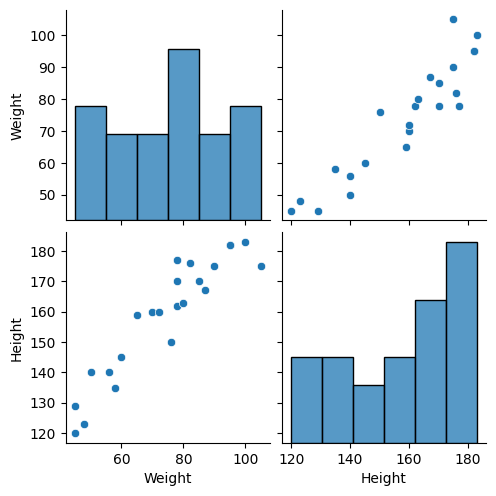

In [7]:
# Seaborn for visualization
import seaborn as sns
sns.pairplot(df)

In [17]:
# Independent and dependent features
X = df[['Weight']] # independent features should be data frame or 2 dimensional array
y = df['Height'] # this variable can be in series and 1d array
np.array(X).shape

(23, 1)

In [18]:
X_series = df['Weight']
np.array(X_series).shape
np.array(y).shape

(23,)

In [19]:
# Train Test Split
from sklearn.model_selection import train_test_split

In [ ]:
# Split the dataset into training and testing parts

# X_train → input data used to train the model
# X_test → input data used to test the model
# y_train → actual output values for training data
# y_test → actual output values for testing data
# test_size = 0.25
# → 25% data for testing, 75% for training
# random_state = 42
# → ensures the same data split every time we run the code

X_train, X_test, y_train, y_test = train_test_split(
    X,          # X → input features (independent variables)
    y,          # y → target/output variable (dependent variable)
    test_size=0.25,  # 25% of the data is used for testing
    random_state=42  # fixes randomness so results are reproducible
)

**sklearn.preprocessing**
→ Module used for data preprocessing (scaling, normalization, encoding)

**StandardScaler**
→ A class used to standardize features
→ Makes data have:  
mean = 0  
standard deviation = 1

In [27]:
# Standardization

from sklearn.preprocessing import StandardScaler

**StandardScaler()**
→ Used to standardize features
→ Converts data to mean = 0 and standard deviation = 1

**fit(X_train)**
→ Calculates mean and standard deviation from training data only

**transform(X_train)**
→ Applies the scaling using calculated mean & std

**fit_transform(X_train)**
→ Does both fit + transform in one step

In [25]:
# Create an object of StandardScaler
scaler = StandardScaler()

# Fit the scaler on training data and transform it
X_train = scaler.fit_transform(X_train)

In [28]:
# Transform the test data using the same scaler fitted on training data
X_test = scaler.transform(X_test)

In [29]:
X_test

array([[ 78.],
       [ 78.],
       [ 45.],
       [ 95.],
       [ 65.],
       [105.]])

In [30]:
## Apply Simple Linear Regression

from sklearn.linear_model import LinearRegression

In [35]:
# Create a Linear Regression model object
# n_jobs = -1 means use all available CPU cores for faster computation
regression = LinearRegression(n_jobs=-1)

In [36]:
# Train (fit) the Linear Regression model using training data
regression.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,-1
,positive,False


In [39]:
# Display the coefficients (slopes/weights) learned by the Linear Regression model
print("Coefficient or slope:", regression.coef_)

# Display the intercept (constant term) of the regression equation
print("Intercept:", regression.intercept_)

Coefficient or slope: [17.2982057]
Intercept: 156.47058823529412


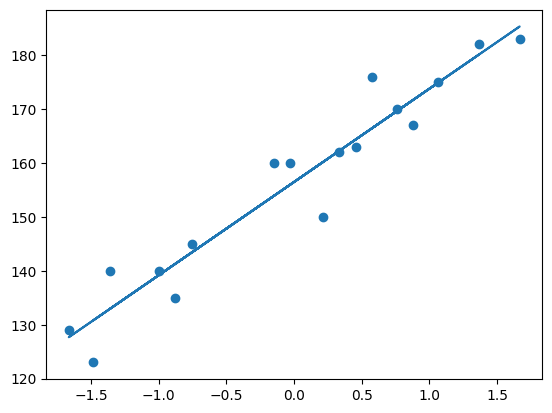

In [40]:
# Plot Training data plot best fit line
plt.scatter(X_train, y_train)
plt.plot(X_train, regression.predict(X_train))

### Prediction of test data
predicted height output = intercept + corf_(Weights)  
y_pred_test = 156.470 + 17.29(X_test)

In [44]:
# Prediction for test data
y_pred = regression.predict(X_test)

In [45]:
# Performance Metrics

from sklearn.metrics import mean_absolute_error, mean_squared_error

In [46]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(mse)
print(mae)
print(rmse)

1886933.5397307759
1336.1312312741586
1373.6569949338793


In [47]:
from sklearn.metrics import r2_score

In [48]:
score = r2_score(y_test, y_pred)
print(score)

-4335.393707648128


In [49]:
# display adjusted R-squared

1 - (1 - score) * (len (y_test) - 1)/ (len (y_test) - X_test.shape[1] -1 )

-5419.49213456016

In [52]:
!pip install statsmodels

In [53]:
# OLS Linear Regression

import statsmodels.api as sm

In [54]:
model = sm.OLS(y_train, X_train).fit()

In [55]:
prediction = model.predict(X_test)
print(prediction)

[1349.26004494 1349.26004494  778.4192567  1643.32954191 1124.38337078
 1816.31159896]


In [56]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Tue, 23 Dec 2025   Prob (F-statistic):                       0.664
Time:                        21:11:46   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [58]:
## Prediction for new data
regression.predict(scaler.transform([[72]]))

array([1401.94139895])